## DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**DATA**

Here is where i get the data

Disney Data: https://www.kaggle.com/shivamb/disney-movies-and-tv-shows

Netflix Data: https://www.kaggle.com/shivamb/netflix-shows

**Netflix data frame**

In [2]:
netflix_main = pd.read_csv("netflix_titles.csv")

In [3]:
netflix = netflix_main[netflix_main["type"] == "Movie"]

In [5]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [33]:
# droping data with empty value on columns rating and duration
netflix = netflix[netflix["rating"].notna()]
netflix = netflix[netflix["duration"].notna()]

In [35]:
# changing date_added into datetime dtype
netflix["date_added"] = pd.to_datetime(netflix["date_added"], dayfirst=True)

# changing duration into int dtype
netflix["duration"] = netflix['duration'].map(lambda x: x.rstrip('min')).astype(int)

In [36]:
# we want to know all the movies that been added since 2020 September
netflix = netflix[netflix["date_added"] >= "2020-09-01"]

In [37]:
#we want to drop description columns
netflix = netflix.drop(columns=["description"])

In [38]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies"
...,...,...,...,...,...,...,...,...,...,...,...
8506,s8507,Movie,The Sign of Venus,Dino Risi,"Sophia Loren, Franca Valeri, Vittorio De Sica,...",Italy,2020-11-13,1955,TV-14,97,"Classic Movies, Comedies, Independent Movies"
8515,s8516,Movie,The Spy Next Door,Brian Levant,"Jackie Chan, Amber Valletta, George Lopez, Bil...",United States,2020-11-01,2010,PG,94,"Action & Adventure, Children & Family Movies, ..."
8607,s8608,Movie,Tortilla Soup,Maria Ripoll,"Hector Elizondo, Jacqueline Obradors, Elizabet...",United States,2020-09-15,2001,PG-13,104,"Comedies, Dramas, Romantic Movies"
8689,s8690,Movie,Waiting...,Rob McKittrick,"Ryan Reynolds, Anna Faris, Justin Long, David ...",United States,2020-09-23,2005,R,94,"Comedies, Independent Movies"


**Disney+ Data Frame**

In [39]:
disney_main = pd.read_csv("disney_plus_titles.csv")

In [40]:
# movie data
disney = disney_main[disney_main["type"] == "Movie"]

In [43]:
disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [49]:
# droping data with empty value on columns rating
disney = disney[disney["rating"].notna()]

In [50]:
# changing date_added into datetime dtype
disney["date_added"] = pd.to_datetime(disney["date_added"], dayfirst=True)

# changing duration into int dtype
disney["duration"] = disney['duration'].map(lambda x: x.rstrip('min')).astype(int)

In [51]:
# we want to know all the movies that been added since 2020 September
disney = disney[disney["date_added"] >= "2020-09-01"]

In [52]:
#we want to drop description columns
disney = disney.drop(columns=["description"])

In [53]:
disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23,"Animation, Family"
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91,Comedy
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family"
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41,Musical
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary"
...,...,...,...,...,...,...,...,...,...,...,...
1444,s1445,Movie,Ice Age: Dawn Of The Dinosaurs,Carlos Saldanha,"Ray Romano, John Leguizamo, Denis Leary, Simon...","United States, United Kingdom, Australia",2021-06-04,2009,PG,97,"Animation, Comedy, Family"
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108,"Action-Adventure, Family, Science Fiction"
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106,"Action-Adventure, Comedy, Family"
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107,"Biographical, Comedy, Drama"


**Exploration**

In [54]:
# which one have more movie added since September 2020

movie_added = pd.DataFrame({"disney_movies": disney["title"],
                           "netflix_movies": netflix["title"]})

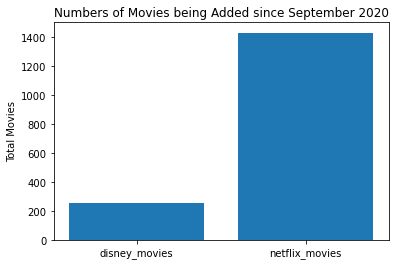

In [55]:
y_total_movies = [movie_added["disney_movies"].nunique(), movie_added["netflix_movies"].nunique()]

plt.bar(movie_added.columns, y_total_movies)
plt.ylabel("Total Movies")
plt.title("Numbers of Movies being Added since September 2020")
plt.show()

In [56]:
# which one have more new movies that release in 2021

new_netflix = netflix[netflix["release_year"] == 2021]
new_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91,Children & Family Movies
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies"
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021-09-22,2021,TV-PG,91,"Children & Family Movies, Comedies"
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021,TV-14,94,Thrillers
...,...,...,...,...,...,...,...,...,...,...,...
1425,s1426,Movie,Creating The Queen's Gambit,NaN,NaN,United States,2021-01-08,2021,TV-14,14,Documentaries
1431,s1432,Movie,Stuck Apart,NaN,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,2021-01-08,2021,TV-MA,97,"Comedies, Dramas, International Movies"
1436,s1437,Movie,Ratones Paranoicos: The Band that Rocked Argen...,"Alejandro Ruax, Ramiro Martínez","Juan Sebastián Gutiérrez, Pablo Cano, Pablo Me...",NaN,2021-01-06,2021,TV-MA,76,"Documentaries, International Movies, Music & M..."
1466,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,2021-01-01,2021,TV-14,54,Documentaries


In [57]:
new_disney = disney[disney["release_year"] == 2021]
new_disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41,Musical
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary"
14,s15,Movie,America the Beautiful,NaN,Michael B. Jordan,NaN,2021-11-12,2021,TV-PG,2,Animals & Nature
15,s16,Movie,Baymax!,NaN,NaN,NaN,2021-11-12,2021,TV-G,1,Animation
16,s17,Movie,Ciao Alberto,McKenna Harris,"Jack Dylan Grazer, Marco Barricelli",NaN,2021-11-12,2021,TV-PG,8,"Animation, Comedy, Family"
...,...,...,...,...,...,...,...,...,...,...,...
266,s267,Movie,Star Wars Vintage: Story of the Faithful Wookiee,NaN,NaN,NaN,2021-04-02,2021,TV-Y7-FV,9,Animation
282,s283,Movie,Own the Room,"Cristina Costantini, Darren Foster","Alondra Toledo, Daniela Blanco, Henry Onyango,...",NaN,2021-03-12,2021,TV-14,91,Documentary
290,s291,Movie,Myth: A Frozen Tale,Jeff Gipson,Evan Rachel Wood,United States,2021-02-26,2021,TV-G,12,"Animation, Family, Fantasy"
297,s298,Movie,Flora & Ulysses,Lena Khan,"Matilda Lawler, Alyson Hannigan, Ben Schwartz,...",United States,2021-02-19,2021,PG,95,"Comedy, Coming of Age, Drama"


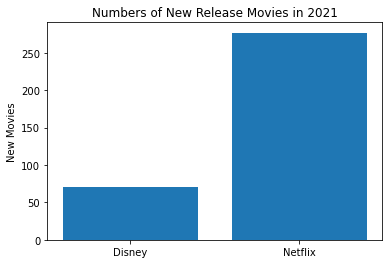

In [58]:
y_new_movies = [new_disney["title"].nunique(), new_netflix["title"].nunique()]
x_new_movies = ["Disney", "Netflix"]

plt.bar(x_new_movies, y_new_movies)
plt.ylabel("New Movies")
plt.title("Numbers of New Release Movies in 2021")
plt.show()

In [60]:
# how many movies being added every months
netflix_added = netflix.groupby(netflix.date_added.dt.to_period("M")).count()
y1 = netflix_added["show_id"].values
y1

array([115, 116, 103, 101,  96,  65,  75, 135,  94, 124, 169, 117, 118],
      dtype=int64)

In [61]:
disney_added = disney.groupby(disney.date_added.dt.to_period("M")).count()
disney_added = disney_added.drop(["2021-10", "2021-11"])
y2 = disney_added["show_id"].values
y2

array([12, 14, 17, 22, 11, 13,  5, 23, 12, 11, 26, 13, 16], dtype=int64)

In [62]:
x = pd.Series(['2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
             '2021-09'])

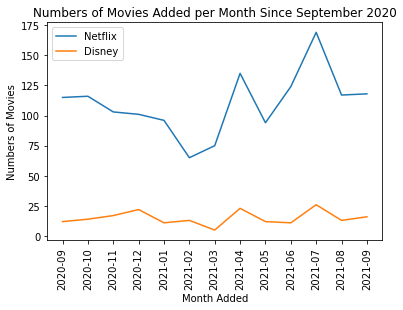

In [63]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.title("Numbers of Movies Added per Month Since September 2020")
plt.ylabel("Numbers of Movies")
plt.xlabel("Month Added")
plt.legend(["Netflix", "Disney"])
plt.xticks(rotation=90)
plt.show()

SUM MOVIE ADDED EVERY MONTH

In [64]:
netflix["date_added"].count() / 13

109.84615384615384

In [65]:
disney["date_added"].count() / 13

19.692307692307693

In [66]:
# we want to know what is the most rating in each platform
netflix_rating = netflix.groupby(netflix.rating).count()
new_netflix_rating = pd.Series({"0-6 y.o": netflix_rating.show_id[["G", "PG", "TV-Y", "TV-G"]].sum(),
                                  "7-13 y.o": netflix_rating.show_id[["TV-PG", "TV-Y7"]].sum(),
                                  "13-16 y.o": netflix_rating.show_id[["PG-13", "TV-14"]].sum(),
                                  "17+ y.o": netflix_rating.show_id[["R", "TV-MA"]].sum()})
new_netflix_rating

0-6 y.o      170
7-13 y.o     148
13-16 y.o    484
17+ y.o      626
dtype: int64

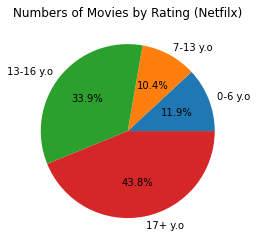

In [67]:
plt.pie(
    new_netflix_rating.values,
    labels=new_netflix_rating.index,
    autopct="%1.1f%%",
)
plt.title("Numbers of Movies by Rating (Netfilx)")
plt.show()

In [71]:
disney_rating = disney.groupby(disney.rating).count()
disney_rating
new_disney_rating = pd.Series({"0-6 y.o": disney_rating.show_id[["G", "PG", "TV-G", "TV-Y"]].sum(),
                               "7-13 y.o": disney_rating.show_id[["TV-PG", "TV-Y7-FV"]].sum(),
                               "13-16 y.o": disney_rating.show_id[["PG-13", "TV-14"]].sum(),
                               "17+ y.o": 0})
new_disney_rating

0-6 y.o      142
7-13 y.o      65
13-16 y.o     49
17+ y.o        0
dtype: int64

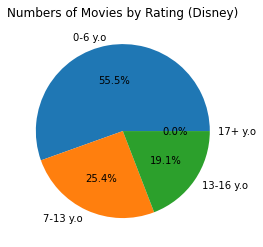

In [72]:
plt.pie(
    new_disney_rating.values,
    labels=new_disney_rating.index,
    autopct="%1.1f%%",
)
plt.title("Numbers of Movies by Rating (Disney)")
plt.show()

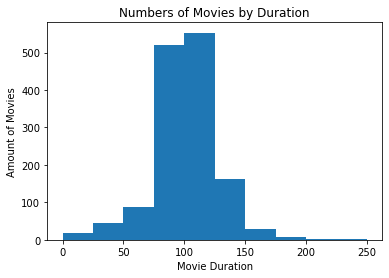

In [85]:
plt.hist(netflix.duration, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.xlabel("Movie Duration")
plt.ylabel("Amount of Movies")
plt.title("Numbers of Movies by Duration")
plt.show()

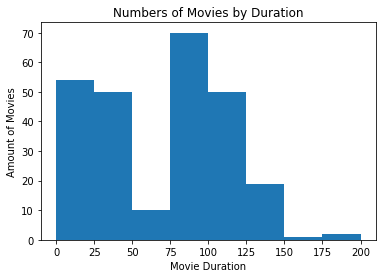

In [86]:
plt.hist(disney.duration, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.xlabel("Movie Duration")
plt.ylabel("Amount of Movies")
plt.title("Numbers of Movies by Duration")
plt.show()